In [6]:
# Final Project, Part 3

# Due by class, submitted in a repository and a link that can be rendered in HTML.

# You can approach this as:

# Raw HTML
# Iodide
# Idyll
# Github pages
# Embedded Jupyter notebooks
# Others?
# You will be writing an interactive data visualization article aimed at the public. Your article should feature:

# A compelling title don't forget to specify that you are the author!
# At least one central interactive visualization featuring your primary dataset. This can be similar to what you submitted
# in the last phase, but does not need to be a dashboard. Remember, this is for the public so it should be large and
# friendly. At least two contextual visualizations - these can be other data visualizations you've done, or images from
# other places (remember to site your sources!!). At least 3 paragraphs of connective information to help a novice
# understand what is happening in your datasets. Citations of all the data sources used and information for the reader to
# be able to find those datasets themselves. You should submit:

# Code (in the form of a URL):

# The GitHub (or other) URL where the code is stored or a link specifying what to enter in nbviewer/mybinder.
# You can receive extra credit for including more than the required minimum. This can include making more than one
# visualization interactive, incorporating more than 1 visualization you've done yourself, or incorporating more than
# your main dataset into the three visualizations. Look to data visualization articles on fivethirtyeight.com, the
# New York Times website, or elsewhere for inspiration. You will get feedback over the next week and have an opportunity
# to re-submit this next week for your final project.

# NOTE: There will be a "presentation portion" of this part of the assignment that will be posting your final submission
#       in the forum & getting/giving feedback.

# Your grade will consist of:

# What you turn in here: Your central viz (20 points), your 2 contextual visualizations (30 pts), your write up (20 pts).

# Your submission will not be accepted without proper citation and links to data (unless the data cannot be shared in which
# case you will need to send me an email outlining the reasons for this).

In [2]:
# Imporing pandas for reading the csv

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
import ipywidgets 
import bqplot
from ipywidgets import interact, interact_manual, HBox, VBox
import datetime

# Get To Know More About Amazon's Top 50 Bestselling Books From 2009 to 2019

Author: Palash Badjatya | December 8, 2021

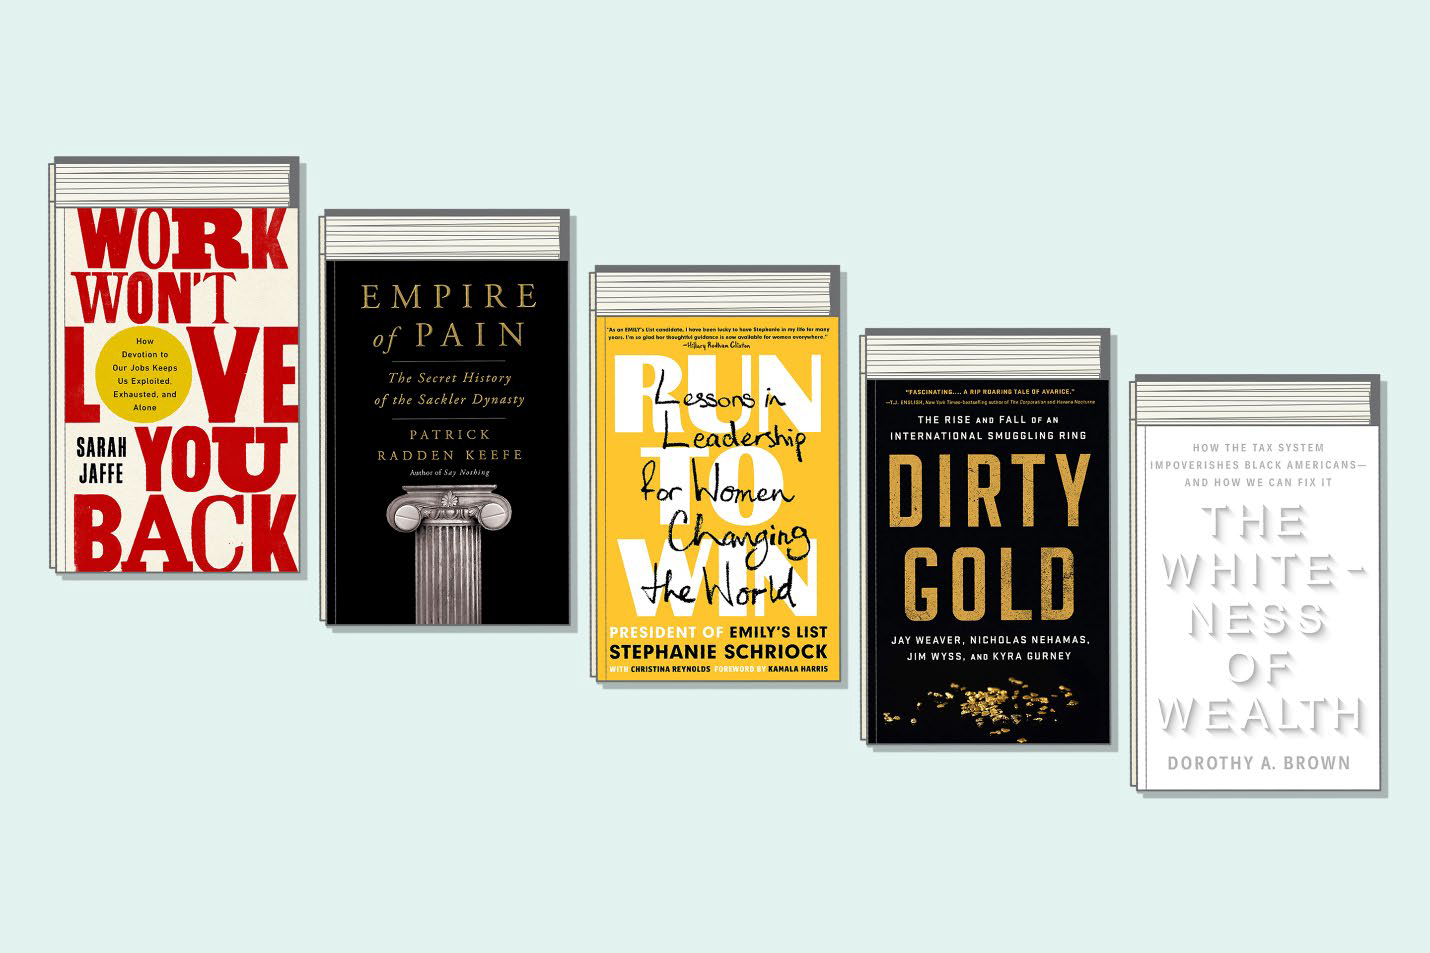

    The key highlighted top 50 titles of every year – those published between 2009 and 2019 and these top reads are classified in the fiction and non-fiction category using GoodReads.
    
    ![image.png](attachment:image.png)
    
    Books are chosen after considering various factors such as price, user rating, and the total number of reviews. If we classify the data based on reviews per genre, we can see the non-fiction category-leading by almost 400 points. Using this data, we can say that all over the years, people loved reading non-fiction novels over fictional novels.

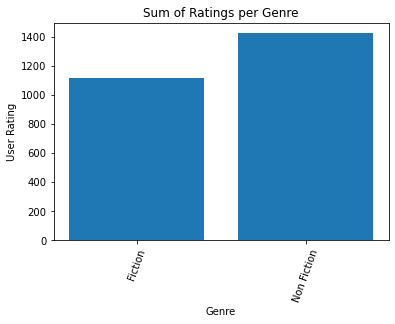

In [19]:
#FINAL
#bar graph
plt.bar(pivotTable.index,pivotTable['User Rating'])

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Genre') 

#y-axis labels 
plt.ylabel('User Rating')

#plot title 
plt.title('Sum of Ratings per Genre')

#display 
BarChart = plt.show()

       Back in 2009, which happens to be the only year people have shown their interest in reading fiction and non-fiction novels almost equally. Other than that, the non-fiction category receives a fair difference in the preference majority of ratings which makes it clear people are more into non-fiction.

In [20]:
##FINAL
##Heat Map
# Scales
mySelectedLabel = ipywidgets.Label() 
col_sc = bqplot.ColorScale(scheme = 'RdPu') # like x/y scale, but in "color space"
x_sc = bqplot.OrdinalScale() # ordered, categorical data, because our bins are more like categorical bins
y_sc = bqplot.OrdinalScale()

#creating list for the subject to be used as columns of our heat map
list_sub = year_pivot.columns.levels[1].to_list()

#Marks
heat_map = bqplot.GridHeatMap(color=year_pivot, scales={'color':col_sc, 'row':y_sc, 'column':x_sc}, 
row = year_pivot.index, column = list_sub,
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'})
color=np.log10(year_pivot.values)

#Axis 
c_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label = 'Genre and Authors')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Years')


i,j = 0,0
mask = (data['Year'] == year_pivot.index[i]) & \
           (data['Genre'] == year_pivot.columns.levels[1][j])
# new, subset dataframe
udemy_subset = data[mask]
# grab years and sqft from pandas
grouped = udemy_subset.groupby("Year")["Reviews"].sum()
Author = grouped.index
Reviews = grouped.values
def get_data_value(change):
    i,j = change['owner'].selected[0]
    # grab buildings subset dataframe
    mask = (data['Year'] == year_pivot.index[i]) & \
           (data['Genre'] == year_pivot.columns.levels[1][j])
    udemy_subset = data[mask]
    # grab years and sqft from pandas
    grouped = udemy_subset.groupby("Author")["User Rating"].mean()
    Author = grouped.index
    Reviews = grouped.values
    barChart.x = Author
    barChart.y = Reviews
heat_map.observe(get_data_value, 'selected')
barChart = bqplot.Bars(x=Author, y=Reviews, scales={'x':x_sc, 'y':y_sc, 'color': col_sc},color_mode='group', stroke='orange')
# finally make a bar plot figure
fig_histogram = bqplot.Figure(marks=[barChart], axes=[x_ax,y_ax],title="Total number of rating for selected author in heat map")
fig_histogram

figure_heat_map = bqplot.Figure(marks=[heat_map], axes=[c_ax, x_ax, y_ax], title="Mean of User Rating for selected Author")
figure_heat_map

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='RdPu'), side='right'), Axis(label='Gen…

    If we see the trend of all books against the total reviews received, we can see that a few of the books have performed exceptionally well, like they have crossed 6000 and 8000 marks.

C:\Users\palas\anaconda3_1\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\palas\anaconda3_1\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


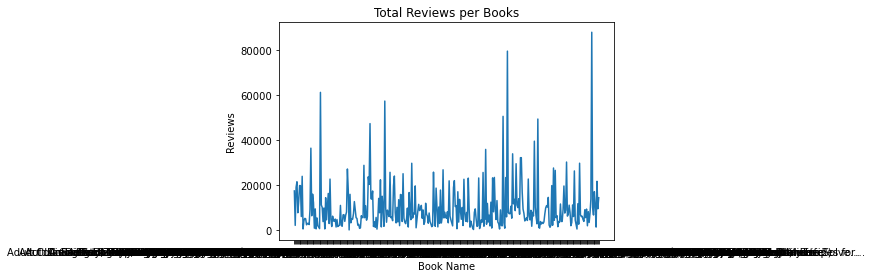

In [21]:
plt.plot(data.Name, data.Reviews)
plt.title('Total Reviews per Books')
plt.xlabel('Book Name')
plt.ylabel('Reviews')
plt.show()

# I just created a simple bar plot of all the books in the dataset and their reviews to see which book recieved what rating
# though this can be done more clearly if the data is limited to TOP 10 / 20 results. 

As a gist of the dataset, it consists of amazon's top 50 bestselling books from 2009
to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using
good reads. I've tried exploring the data set by initially checking the null values in data and
then understanding their data types. This data has seven columns Name, Author, User
Rating, Reviews, Price, Year, and Genre. We can also run some analysis on the price variable
to understand the average price of books.

References

Image 1: Courtesy of Bold Type Books, Public Affairs (https://content.fortune.com/wpcontent/
uploads/2021/06/amazon-best-business-books-2021.png?resize=750,500)
    
Image 2: Fiction, Non- fiction.jpeg (https://image.slidesharecdn.com/fiction-150215205327-
conversion-gate01/95/fiction-and-nonfiction-1-638.jpg?cb=1426377853)

Data Source: Amazon Top 50 Bestselling Books 2009 – 2019,
(https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019)

# All the extra work to reach the final charts

In [5]:
# Description about the data:
    
#     Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized
#     into fiction and non-fiction using Goodreads.
    
#     Mostly the data is clean but might need some re structuring in order to carry out complex insights. For initial
#     analysis everything in the data seems to be working but some other factors like region & country of sales can help in
#     understanding the sales and amazon top 50 ranking better.
    
#     There area a total of 7 Columns in the dataset:
#         • Name of the book (Object)
#         • Name of Author (Object)
#         • User Rating (Float)
#         • Reviews (Int)
#         • Price (Int)
#         • Year (Int)
#         • Genre (Object)
        
#     Using this dataset I can learn about the author who appeared most in the top 50 List, the book which is been in top
#     50 multiple times, rating corresponding to author and book, price range of books to be in top 50 and other relations.
        
#     Name of dataset: Amazon Top 50 Bestselling Books 2009 - 2019
#     Where did you obtain it?: Kaggle.com
#     URL of Dataset: https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
#     License of data: CCO Public Domain means no copyright
#     File Size: ~1MB (7 Columns and 550 Rows)

In [6]:
# Reading data using pandas and also printing the head to understand the architecture

data = pd.read_csv('bestsellers with categories.csv')
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
#Converting year into datetime format
year = datetime.date.today().year

In [8]:
# To understand the type of data type of every columns, Reveals obejct data type which means it is a mix of str and unicodes

data.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [9]:
#Viewing data

data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [10]:
# To check if data has some null values

data.isnull()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [11]:
#This data is or article wanted to confirm the min and max years taken in consideration
print(data.Year.min())
print(data.Year.max())

2009
2019


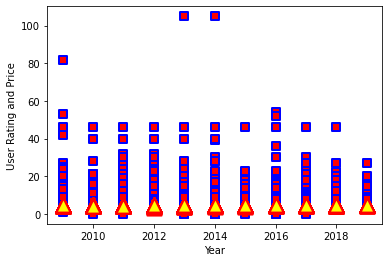

In [13]:
import matplotlib.pyplot as plt
  
# dataset-1
x1 = data['Year']
  
y1 = data['Price']

# dataset2
x2 = data['Year']
  
y2 = data['User Rating']
  
plt.scatter(x1, y1, c ="Red", 
            linewidths = 2, 
            marker ="s", 
            edgecolor ="Blue", 
            s = 50)
  
plt.scatter(x2, y2, c ="yellow",
            linewidths = 2,
            marker ="^", 
            edgecolor ="red", 
            s = 200)
  
plt.xlabel("Year")
plt.ylabel("User Rating and Price")
plt.show()

In [14]:
#FINAL
#Exploring Dataset
@interact
def show_articles_more_than(column=['Price', 'Reviews', 'User Rating'], 
                            x=(1, 5000, 2)):
    return data.loc[data[column] > x]

interactive(children=(Dropdown(description='column', options=('Price', 'Reviews', 'User Rating'), value='Price…

In [15]:
#FINAL
year_pivot = pd.pivot_table(data, index = ["Year"], columns = ["Genre"], values = ["Price"], aggfunc= np.sum)

year_pivot

Price            
Genre Fiction Non Fiction
Year                     
2009      374         396
2010      194         480
2011      244         511
2012      258         507
2013      257         473
2014      295         437
2015      159         362
2016      240         419
2017      212         357
2018      184         342
2019      187         317

In [16]:
#FINAL
pivotTable = pd.pivot_table(data=data,index='Genre',values='User Rating',aggfunc=np.sum)

pivotTable

,User Rating
Genre,
Fiction,1115.6
Non Fiction,1424.5


In [18]:
# Description:
    
#     I started the data exploration Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books,
#     data has been categorized into fiction and non-fiction using Goodreads. I've tried exploring the data set by initially
#     checking the null values in data and then understanding their data types. After getting clarity on these, I built
#     multiple charts that summarise the novel genre in Against of years. This chart shows the combined user rating and
#     reviews for the interactivity part. I also tried exploring the data in terms of the rating of books against the book 
#     name. Then I used a scatter plot to identify trends between user rating, year, and price. Then I created a bar chart
#     to see the sum of reviews per genre of fiction and non-fiction.
    
#     For the data exploration part I used Ipywidgets interactions where in user can select review, price and rating form 
#     the dropdown and then can use the slder to adjust the value of same. The next one uses a text field where coloumn is
#     selected as reviews and from their teh user can adjust the value using the sliders. all these values will appear in 
#     a tablular format from where it is very easy to understand the data of the selected value. Though the first interaction
#     works a bit odd if we select price from the dropdown because all the values in the price table are under 200.
    
#     Furthermore, the dataset has a few columns and an appropriate number of rows to draw conclusions based on  
#     genre and year. Also, the bar chart shows that people love to read more non-fictional books compared to fictional
#     texts. The scatterplot shows a peak in years between 2012 - 2014.
    
#     For future time I will try to include HBox and VBox to create a dashoard like view. from which we can interact with
#     the complete dashboard in a single view. This time I tried using it but was not possible because it was difficult to
#     create a view which I initially imagined.